In [3]:
!pip install mysql-connector-python pandas matplotlib seaborn

In [4]:
import mysql.connector

In [5]:
conn = mysql.connector.connect(
    host="localhost",
    user="telecom",
    password="telecom123",
    database="telco_churn"
)


In [6]:
conn

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
query_overall = """
SELECT 
    COUNT(*) AS total_customers,
    SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) AS churned_customers,
    ROUND(SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)*100.0/COUNT(*),2) AS churn_rate
FROM customers;
"""

df_overall = pd.read_sql(query_overall, conn)


C:\Users\vikas kumar\AppData\Local\Temp\ipykernel_55516\1010718959.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_overall = pd.read_sql(query_overall, conn)


In [9]:
df_overall

,total_customers,churned_customers,churn_rate
0,4543,1191.0,26.22


C:\Users\vikas kumar\AppData\Local\Temp\ipykernel_55516\1011444795.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_contract = pd.read_sql(query_contract,conn)


Text(0.5, 1.0, 'churn rate by contract type')

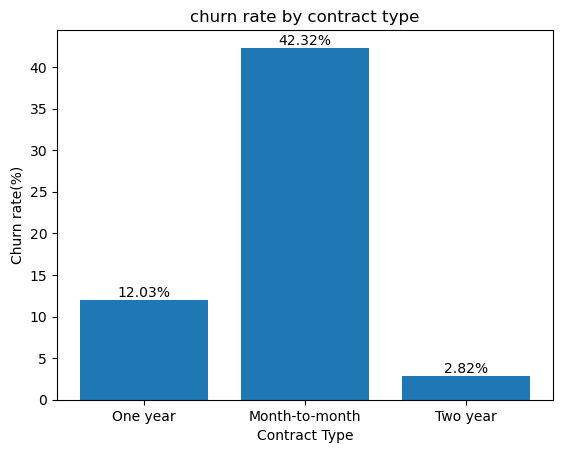

In [10]:
query_contract ="""
SELECT Contract,Round(sum(CASE WHEN churn = 'Yes' Then 1 ELSE 0 END )*100.0/COUNT(*),2) As churn_rate
From customers
Group by Contract;"""
df_contract = pd.read_sql(query_contract,conn)

plt.figure()
plt.bar(df_contract['Contract'],df_contract['churn_rate'])
for i, value in enumerate(df_contract['churn_rate']):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')
plt.xlabel('Contract Type')
plt.ylabel('Churn rate(%)')
plt.title('churn rate by contract type')

C:\Users\vikas kumar\AppData\Local\Temp\ipykernel_55516\2257596390.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tenure = pd.read_sql(query_tenure,conn)


Text(0.5, 1.0, 'Churn rate by tenure Group')

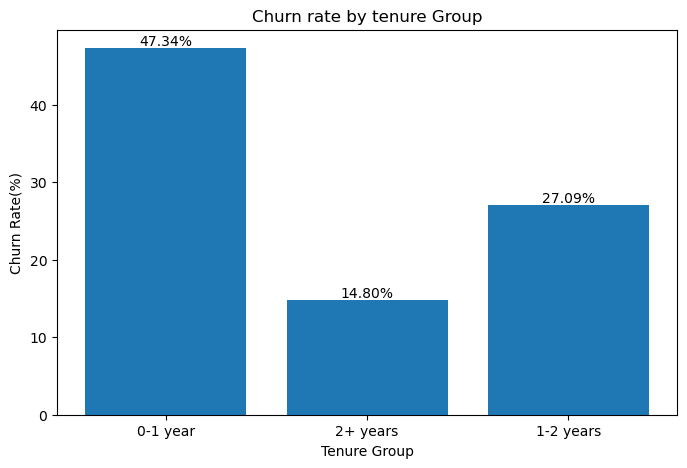

In [25]:
query_tenure = """
SELECT 
    CASE 
        WHEN tenure < 12 THEN '0-1 year'
        WHEN tenure BETWEEN 12 AND 24 THEN '1-2 years'
        ELSE '2+ years'
    END AS tenure_group,
    ROUND(SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)*100.0/COUNT(*),2) AS churn_rate
FROM customers
GROUP BY tenure_group;
"""
df_tenure = pd.read_sql(query_tenure,conn)
plt.figure(figsize=(8, 5))
plt.bar(df_tenure['tenure_group'],df_tenure['churn_rate'])


for i, value in enumerate(df_tenure['churn_rate']):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

plt.xlabel('Tenure Group')
plt.ylabel('Churn Rate(%)')
plt.title('Churn rate by tenure Group')


C:\Users\vikas kumar\AppData\Local\Temp\ipykernel_55516\1058725510.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_charges = pd.read_sql(query_charges,conn)


Text(0.5, 1.0, 'Monthly Charges Distribution by Churn')

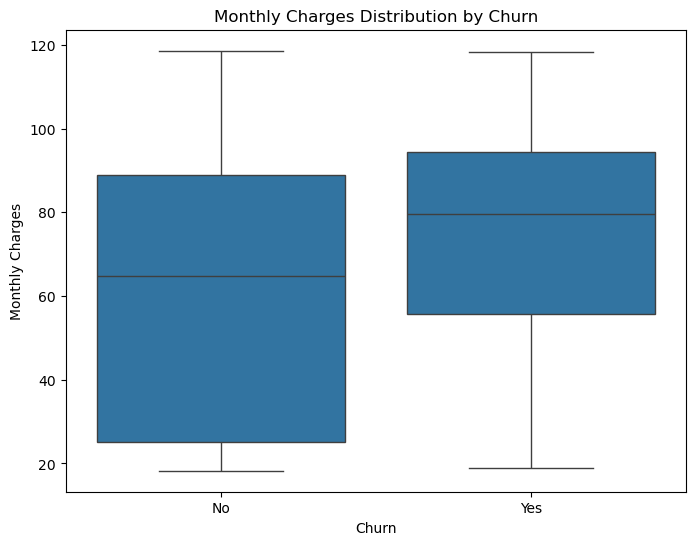

In [27]:
query_charges = """
SELECT MonthlyCharges, Churn
FROM customers;
"""
df_charges = pd.read_sql(query_charges,conn)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_charges)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges Distribution by Churn')

# Bussiness insights 
Total Customers: 4,543

Churned Customers: 1,191

Overall Churn Rate: 26.22%

Retention Rate: 73.78%

## Executive Summary
This analysis evaluates customer churn behavior for a subscription-based business using SQL and Python.
Out of 4,543 total customers, 1,191 customers churned, resulting in an overall churn rate of 26.22% and a retention rate of 73.78%.
The objective was to identify key churn drivers and provide actionable, data-driven retention strategies.
## Key Bussiness Insights
### 1. Contract Type is the Primary Churn Driver
Customers on month-to-month contracts show a significantly higher churn rate (42.32%) compared to one-year (12.03%) and two-year contracts (2.82%).
This indicates that customers without long-term commitment are more likely to discontinue the service.

### 2. Internet Service Type Influences Churn
Customers using fiber optic internet services exhibit the highest churn rate (41.30%), followed by DSL (19.05%).
Customers without internet service have the lowest churn (7.74%), suggesting potential service quality or pricing concerns for fiber optic users.

### 3. Higher Monthly Charges Are Associated with Higher Churn
Customers in the high monthly charge segment have a churn rate of 34.73%, compared to 24.48% for medium and 9.94% for low charge segments.
This suggests price sensitivity and a possible mismatch between cost and perceived value.

### 4. New Customers Are at the Highest Risk of Churn
Customers with a tenure of less than one year show the highest churn rate (47.34%).
Churn decreases as tenure increases, with customers having more than two years of tenure showing a significantly lower churn rate (14.80%).
This highlights challenges in onboarding and early-stage customer engagement.

# Root Cause Summary
The analysis indicates that churn is primarily driven by:

Lack of long-term commitment (month-to-month contracts)

Poor early customer experience

High pricing sensitivity

Service-related issues, particularly among fiber optic users

# Business Recommendations

### 1. Promote Long-Term Contracts

Encourage customers to shift from month-to-month plans to annual or multi-year contracts through discounts and value-added benefits.
Expected Impact: Reduced churn and improved revenue stability.

### 2. Strengthen Customer Onboarding

Implement structured onboarding programs during the first 90 days, including proactive support and educational communication.
Expected Impact: Lower early-stage churn and increased customer lifetime value.

### 3.Introduce Targeted Pricing & Loyalty Offers

Provide personalized discounts or bundled services to high-value and high-risk customers.
Expected Impact: Improved customer satisfaction and reduced revenue loss.

### 4. Improve Fiber Optic Service Experience

Conduct service quality reviews and provide faster issue resolution for fiber optic customers.
Expected Impact: Increased trust and reduced service-related churn.

## Conclusion

This project demonstrates how SQL-driven data extraction combined with Python-based analysis can effectively identify churn patterns and business risks.
By implementing targeted retention strategies focused on high-risk segments, the company can significantly reduce churn and improve long-term customer retention.